# Minimax and alpha-beta pruning

In this notebook we will find explanations and implementations of two search space exploration algorithms: minimax and alpha-beta pruning.

## Mini-max

This algorithm provides a way to make the best decision in worst case scenarios for [zero-sum games](https://en.wikipedia.org/wiki/Zero-sum_game). The purpose of this algorithm is to **mini**mize the loss among the **max**imum _loss_ scenarios, in other words, it assumes the other player will make the best decision possible. Another way to think about this is maximizing the _gain_ amongst the minimum gain scenarios by the opponent. In order to implement this algorithm we must consider the following:

1. **maximizing/minimizing player**: The algorithm constructs a search space in the form of a tree, each level of the tree corresponds to the possible moves of only one player, that may be maximizing (oponent) or minimizing (player)
2. **loss**: This is a numerical value that represents an evaluation of the games state, this value is dependent on which players (maximizing or minimizing) turn is being evaluated.

Below is an image of a tree constructed by the minimax algorithm (in this tree we maximize the gain):

![tree](resources/minimax-tree.png)

Here we can see that the player running the algorithm is maximizing his gain. -7 is chosen over -10 as it is the maximum of the two moves that result of the oponent maximizing his own gain (minimizing the heuristic), hence why in the minimizing level the oponent player choses -7 over 5.

For a simple implementation of this algorithm we will implement a recursive algorithm that will produce the search space in the form of a recursion tree, in which each level of the tree will use a variable to determine which players (maximizing/minimizing) turn it is, this will impact how we calculate the loss.




In [1]:
def is_game_over(node):
    winning_indexes = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5, 8], [0, 4, 8], [2, 4, 6]]

    for indexes in winning_indexes:
        hit_count = 0
        chosen_symbol = node[indexes[0]]

        for index in indexes:
            if node[index] is not None and node[index] == chosen_symbol:
                hit_count = hit_count + 1

        if hit_count == 3:
            return True, chosen_symbol

    if node.count(None) == 0:
        return True, None

    return False, None

def generate_children(node, chosen_symbol):
    pass

def alternate_symbol(symbol):
    return 'o' if symbol == 'x' else 'x'

def mini_max(node, is_maximizing_player_turn, chosen_symbol):
    game_result = is_game_over(node)

    if game_result[0]:
        if game_result[1] is None:
            return 0, node

        return (-1, node) if is_maximizing_player_turn else (1, node)

    children = generate_children(node, chosen_symbol)
    children_results = list(map(
        lambda child: [
            mini_max(child, not is_maximizing_player_turn, alternate_symbol(chosen_symbol))[0],
            child
        ],
        children
    ))

    return max(children_results, key=str) if is_maximizing_player_turn else min(children_results, key=str)

## Alpha-beta pruning

Minimax is a very useful algorithm, however, the creation of the full tree is not entirely necessary, this is because some subtrees in a turn can be guaranteed to produce a less optimal outcome for a player by just evaluating one or some of the terminal nodes. An example can be seen below:

![Alpha-beta Tree](resources/alpha-beta-tree.png)

The nodes marked with a question mark are not evaluated. The following process leads to this tree:

1. The left subtree is evaluated with a result of 3 for the black player
2. The first terminal node of the right subtree is 1 for the white player
3. The parent node of the 1 does not need to evaluate the next node, given that the white player already has a higher score than 1 (3), so the black player wont chose any other value of the node that isn't <= 1 (remember the black player is minimizing the score)
4. The black player node is guaranteed to be <= 1 so it takes that value
5. The next two white nodes are evaluated as 5 and 2 (2 cannot be pruned, since 5 would be a better outcome for white, so it must evaluate more nodes) and the black player takes a value of 2
6. The white player takes the value of two
7. Since 2 is already a lower score than 3, black need not evaluate more nodes, as the result is guaranteed to be <= 2
8. White chooses 3

A video explanation follows (minute 5:13):

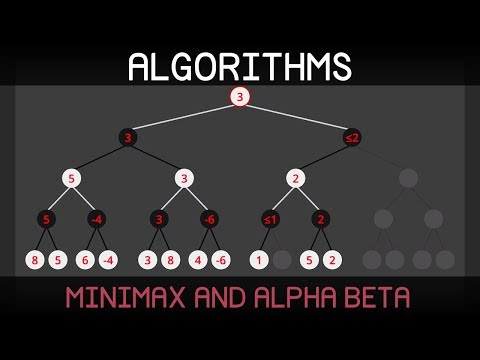

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo("l-hh51ncgDI")

## Execise: Alpha-beta pruning your tic-tac-toe

```
Integrante 1: <>
Integrante 2: <>
```

Your task is to modify the algorithm provided above with the necessary conditions for alpha beta pruning to occur. You must also then modify the game in order for the machine turn to use your algorithm. Creating the algorithm must also involve generating the possible states of the game. In order to complete this, you must clone this repository, fill in the `TODO` comments in the `tic_tac_toe.py` and `alpha_beta.py` files and send me the link to a fork of this repo where your solution lies.